### 2023-04-02

## 2-2. Mediapipe를 이용한 skeleton keypoint 추출

- google colab에서 진행(macOS에서 미디아파이프가 설치되지 않는 오류 발생)


In [ ]:
# mediapipe setting
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.6/33.6 MB 44.1 MB/s eta 0:00:00


#### 위 번호만 추출하여 저장하기

In [ ]:
need = [0, 11, 12, 13, 14, 15, 16, 23, 24, 25, 26, 27, 28, 31, 32]
print(f'필요한 keypotin의 개수 : {len(need)}')

필요한 keypotin의 개수 : 15


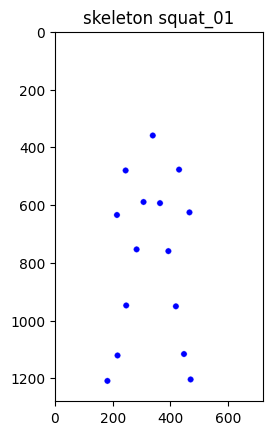

In [ ]:
background = np.zeros(shape=(1280, 720, 3), dtype=np.uint8) + 255

for i in need:
  first = landmarks_list[i]
  cx = int(first[0]*720)
  cy = int(first[1]*1280)
  cv2.circle(background, (cx, cy), radius=5, color=(0,0,255), thickness=10)

plt.title('skeleton squat_01')
plt.imshow(background)

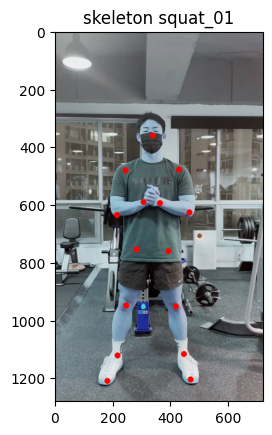

In [ ]:
# 원본 사진에 그려보기

background = cv2.imread('/content/drive/MyDrive/2023/캡스톤디자인/img_data/squat_0.jpg')

for i in need:
  first = landmarks_list[i]
  cx = int(first[0]*720)
  cy = int(first[1]*1280)
  cv2.circle(background, (cx, cy), radius=5, color=(255,0,0), thickness=10)

plt.title('skeleton squat_01')
plt.imshow(background)

### 이제 위에서 얻은 키포인트의 좌표값들을 데이터프레임으로 만들어서 csv파일로 저장한다.

In [ ]:
columns_rename = [
              'noseX', 'noseY',
              'left_shoulderX', 'left_shoulderY',
              'right_shoulderX', 'right_shoulderY',
              'left_elbowX', 'left_elbowY',
              'right_elbowX', 'right_elbowY',
              'left_wristX', 'left_wristY',
              'right_wristX', 'right_wristY',
              'left_hipX', 'left_hipY',
              'right_hipX', 'right_hipY',
              'left_kneeX', 'left_kneeY',
              'right_kneeX', 'right_kneeY',
              'left_ankleX', 'left_ankleY',
              'right_ankleX', 'right_ankleY',
              'left_footX', 'left_footY',
              'right_footX', 'right_footY'
              ]

In [ ]:
columns_rename

['noseX',
 'noseY',
 'left_shoulderX',
 'left_shoulderY',
 'right_shoulderX',
 'right_shoulderY',
 'left_elbowX',
 'left_elbowY',
 'right_elbowX',
 'right_elbowY',
 'left_wristX',
 'left_wristY',
 'right_wristX',
 'right_wristY',
 'left_hipX',
 'left_hipY',
 'right_hipX',
 'right_hipY',
 'left_kneeX',
 'left_kneeY',
 'right_kneeX',
 'right_kneeY',
 'left_ankleX',
 'left_ankleY',
 'right_ankleX',
 'right_ankleY',
 'left_footX',
 'left_footY',
 'right_footX',
 'right_footY']

In [ ]:
df.columns = set_colums

In [ ]:
df.to_csv('/content/drive/MyDrive/2023/캡스톤디자인/csv/sample.csv')

<br><br><br>


## 1. 16장의 이미지에 대해 csv 파일 추출하기
- 함수로 구현하기
- 이미지 추출하는데 타이머 세팅해서 시간 계산하기

In [ ]:
# 1. 이미지 불러오기

import os

images_path = '/content/drive/MyDrive/2023/캡스톤디자인/sample1/'
temp = os.listdir(images_path)
temp

['exercise_13.jpg',
 'exercise_08.jpg',
 'exercise_12.jpg',
 'exercise_09.jpg',
 'exercise_06.jpg',
 'exercise_07.jpg',
 'exercise_04.jpg',
 'exercise_05.jpg',
 'exercise_11.jpg',
 'exercise_00.jpg',
 'exercise_03.jpg',
 'exercise_14.jpg',
 'exercise_01.jpg',
 'exercise_15.jpg',
 'exercise_10.jpg',
 'exercise_02.jpg']

In [ ]:
images = sorted(temp)
images

['exercise_00.jpg',
 'exercise_01.jpg',
 'exercise_02.jpg',
 'exercise_03.jpg',
 'exercise_04.jpg',
 'exercise_05.jpg',
 'exercise_06.jpg',
 'exercise_07.jpg',
 'exercise_08.jpg',
 'exercise_09.jpg',
 'exercise_10.jpg',
 'exercise_11.jpg',
 'exercise_12.jpg',
 'exercise_13.jpg',
 'exercise_14.jpg',
 'exercise_15.jpg']

In [ ]:
images_path + images[0]

'/content/drive/MyDrive/2023/캡스톤디자인/sample1/exercise_00.jpg'

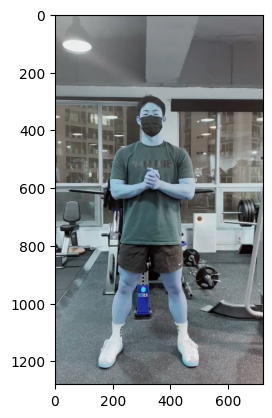

In [ ]:
testImg = cv2.imread(images_path + images[0])
plt.imshow(testImg)

In [ ]:
a = results.pose_landmarks
len(a.ListFields()[0][1])

33

In [ ]:
landmarks_list

[(0.4394882917404175, 0.5071427822113037, -0.7704789638519287),
 (0.45223337411880493, 0.4949374198913574, -0.731069803237915),
 (0.4623432457447052, 0.4953121244907379, -0.7310514450073242),
 (0.4730384945869446, 0.4957200586795807, -0.7311952114105225),
 (0.4256797432899475, 0.494956910610199, -0.7322556972503662),
 (0.4154217541217804, 0.4955376982688904, -0.73246830701828),
 (0.4060954749584198, 0.4963894486427307, -0.7326098680496216),
 (0.49396899342536926, 0.5035357475280762, -0.5108066201210022),
 (0.39234158396720886, 0.5054487586021423, -0.5091472864151001),
 (0.45583316683769226, 0.5223586559295654, -0.6875375509262085),
 (0.4274747967720032, 0.5229222774505615, -0.6873877048492432),
 (0.5768585801124573, 0.5857763290405273, -0.3918307423591614),
 (0.3127090334892273, 0.5842219591140747, -0.40903440117836),
 (0.6131676435470581, 0.6962302923202515, -0.6170822978019714),
 (0.28787270188331604, 0.6981194615364075, -0.6400813460350037),
 (0.4929873049259186, 0.6597838401794434,

In [ ]:
import mediapipe as mp
import cv2

def img_to_skeleton(image_path) :

  # 모듈 로드
  mp_pose = mp.solutions.pose

  # 이미지에서 프레임을 읽어온다.
  image = cv2.imread(image_path)

  # HumanPose 모듈을 사용하여 스켈레톤을 추출한다.
  with mp_pose.Pose(
      min_detection_confidence=0.5,
      min_tracking_confidence=0.5) as pose:

      # 추출된 스켈레톤을 저장할 리스트를 생성한다.
      landmarks_list = []

      # 스켈레톤을 추출한다.
      results = pose.process(image)

      if len(results.pose_landmarks.ListFields()[0][1]) == 33: # 33보다 적거나 많다는 것은 잘못된 추출이다.
        landmark = results.pose_landmarks.landmark

        # 필요한 관절 좌표만 선별적으로 저장한다.
        need = [0, 11, 12, 23, 24, 25, 26, 27, 28, 31, 32]
        for i in need:
          # 스켈레톤의 좌표를 저장한다.
          # 이때, 해당 이미지 크기에 맞는 사이즈 비율을 조정하여 저장한다.
          x = landmark[i].x * image.shape[1]
          y = landmark[i].y * image.shape[0]
          landmarks_list.append((int(x), int(y))) # x,y좌표만 저장한다.

      else:
        return 'There is a problem.'

  return landmarks_list

In [ ]:
# 함수 실행
lst = img_to_skeleton('/content/drive/MyDrive/2023/캡스톤디자인/sample1/exercise_14.jpg')

In [ ]:
len(lst)

15

In [ ]:
lst

[(319, 350),
 (418, 469),
 (233, 472),
 (450, 608),
 (206, 616),
 (350, 550),
 (302, 550),
 (385, 744),
 (274, 744),
 (413, 940),
 (231, 941),
 (449, 1120),
 (214, 1119),
 (475, 1204),
 (166, 1204)]

In [ ]:
img_test = cv2.imread('/content/drive/MyDrive/2023/캡스톤디자인/sample1/exercise_14.jpg')

In [ ]:
print(f'img shape : {img_test.shape}')
print(f'x : {img_test.shape[0]}, y : {img_test.shape[1]}')

img shape : (1280, 720, 3)
x : 1280, y : 720


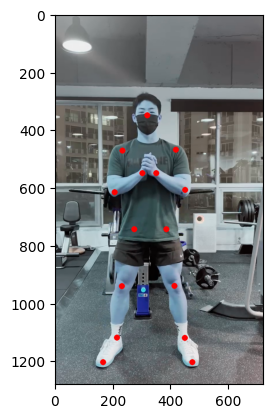

In [ ]:
import matplotlib.pyplot as plt

for i in lst:
  cx = i[0]
  cy = i[1]
  cv2.circle(img_test, (cx, cy), radius=5, color=(255,0,0), thickness=10)

plt.imshow(img_test)

done.

## 2. 이제 위에서 만든 함수를 응용하여 16개의 이미지에 대해서 스켈레톤을 추출하고 리스트로 저장하자.

In [ ]:
import os

directory = '/content/drive/MyDrive/2023/캡스톤디자인/sample1/'

sample1 = os.listdir(directory)
sample1 = sorted(sample1)
sample1

['exercise_00.jpg',
 'exercise_01.jpg',
 'exercise_02.jpg',
 'exercise_03.jpg',
 'exercise_04.jpg',
 'exercise_05.jpg',
 'exercise_06.jpg',
 'exercise_07.jpg',
 'exercise_08.jpg',
 'exercise_09.jpg',
 'exercise_10.jpg',
 'exercise_11.jpg',
 'exercise_12.jpg',
 'exercise_13.jpg',
 'exercise_14.jpg',
 'exercise_15.jpg']

In [ ]:
total_skeleton = []

for img in sample1 :
  path = directory + img
  total_skeleton.append(img_to_skeleton(path))

In [ ]:
len(total_skeleton)

16

In [ ]:
total_skeleton[0]

[(333, 364),
 (431, 480),
 (243, 483),
 (466, 626),
 (215, 638),
 (360, 595),
 (309, 596),
 (391, 756),
 (283, 750),
 (419, 951),
 (243, 947),
 (447, 1112),
 (215, 1116),
 (470, 1201),
 (182, 1204)]

In [ ]:
for skeleton in range(len(total_skeleton)):
  for i in skeleton:
    temp = np.array(i).flatten()
    

(333, 364)
(431, 480)
(243, 483)
(466, 626)
(215, 638)
(360, 595)
(309, 596)
(391, 756)
(283, 750)
(419, 951)
(243, 947)
(447, 1112)
(215, 1116)
(470, 1201)
(182, 1204)


In [ ]:
import numpy as np

arr1 = np.array(total_skeleton[0])
arr1 = arr1.flatten()

arr2 = np.array(total_skeleton[1])
arr2 = arr2.flatten()

In [ ]:
df1 = pd.DataFrame([arr1, arr2])
df1

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,333,364,431,480,243,483,466,626,215,638,...,243,947,447,1112,215,1116,470,1201,182,1204
1,336,361,425,478,243,482,460,620,213,635,...,238,951,447,1119,217,1123,473,1204,180,1212


In [ ]:
df = pd.DataFrame()

for i in range(len(total_skeleton)):
  temp = np.array(total_skeleton[i])
  temp = temp.flatten()
  df[i] = temp

df_total = df.T

In [ ]:
df_total

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,333,364,431,480,243,483,466,626,215,638,...,243,947,447,1112,215,1116,470,1201,182,1204
1,336,361,425,478,243,482,460,620,213,635,...,238,951,447,1119,217,1123,473,1204,180,1212
2,335,357,431,478,241,476,459,623,209,630,...,233,951,447,1118,216,1118,471,1205,179,1211
3,331,360,428,478,239,477,458,623,210,632,...,229,945,451,1117,217,1117,467,1205,179,1206
4,328,376,419,492,237,494,454,637,207,650,...,218,949,447,1126,214,1123,472,1209,179,1212
5,323,419,418,537,232,536,445,682,210,684,...,193,959,445,1121,208,1116,473,1206,173,1207
6,315,481,414,593,228,587,449,736,193,738,...,168,974,448,1123,204,1118,475,1206,165,1203
7,313,557,421,666,231,662,443,803,207,806,...,164,997,447,1122,207,1120,470,1202,166,1206
8,316,617,421,722,226,718,445,866,207,861,...,168,998,448,1120,213,1117,470,1207,170,1203
9,316,649,415,749,225,747,441,891,207,893,...,172,1006,449,1118,211,1120,467,1198,169,1205


In [ ]:
df_total.to_csv('/content/drive/MyDrive/2023/캡스톤디자인/csv/sample1.csv')